In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
raw_df=pd.read_csv('music.csv')
music_data=raw_df.copy()
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [3]:
X=music_data.drop(columns=['genre'])    
y=music_data['genre']                      

In [4]:
model=DecisionTreeClassifier()
model.fit(X,y)
predictions=model.predict([[21,1],[22,0]])       # asked genre for 21 yr 1 ie male and 22 yr 0 ie female
predictions

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

In [5]:
# prediction is correct because hiphop age range for male is 20 to 25
# prediction is correct because dance age range for female is 20 to 25

In [6]:
# testing accuracy

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# general rule of thumb
# 70-80 % for training and 20-30 % for testing

In [9]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)    #20% allocated for testing

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
score

1.0

In [10]:
# on executing code mutiple times accuracy occilates b/w 50 to 100 %

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.8)    #80% allocated for testing

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
score

0.26666666666666666

In [12]:
# on executing code mutiple times accuracy occilates b/w 26 to 40 %
# because we give only 20% data to training the model which is very less

In [13]:
#persisting models

In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

model=DecisionTreeClassifier()
model.fit(X,y)

joblib.dump(model, 'music-recommender.joblib')       # saving model to local server

['music-recommender.joblib']

In [15]:
model=DecisionTreeClassifier()
model.fit(X,y)

model = joblib.load('music-recommender.joblib')

predictions=model.predict([[21,1]])
predictions

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

In [16]:
# visualising a decision tree

In [17]:
from sklearn import tree

In [18]:
tree.export_graphviz(model, out_file = 'music-recommender.dot',
                     feature_names=['age','gender'],
                     class_names=sorted(y.unique()),
                     label='all',
                     rounded=True,
                     filled=True

)

[Text(0.625, 0.875, 'X[0] <= 30.5\ngini = 0.778\nsamples = 18\nvalue = [3, 6, 3, 3, 3]'),
 Text(0.5, 0.625, 'X[1] <= 0.5\ngini = 0.75\nsamples = 12\nvalue = [3, 0, 3, 3, 3]'),
 Text(0.25, 0.375, 'X[0] <= 25.5\ngini = 0.5\nsamples = 6\nvalue = [3, 0, 3, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]'),
 Text(0.75, 0.375, 'X[0] <= 25.5\ngini = 0.5\nsamples = 6\nvalue = [0, 0, 0, 3, 3]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]')]

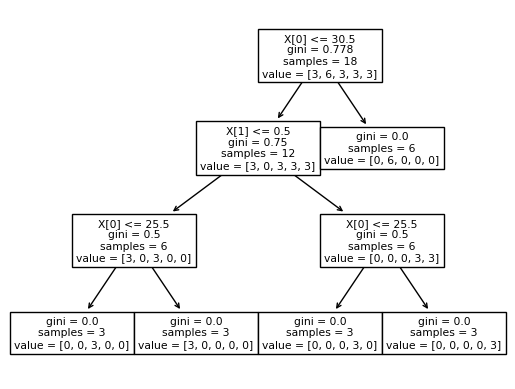

In [19]:
tree.plot_tree(model)